<center><h1>Analysis of marketing campaigns in the banking Industry</h1></center>

<img src="https://images.unsplash.com/photo-1430276084627-789fe55a6da0?q=80&w=2073&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width="600"/>

This project contains a detailed analysis of a bank's marketing campaign data. The primary objective of this analysis is to understand the effectiveness of different marketing strategies and to provide data-driven recommendations for future campaigns. Through a comprehensive examination of demographic trends, response rates by job category, and the impact of marital status on conversion rates, we aim to identify key factors that influence the success of marketing efforts.

The analysis also delves into the implications of using sampled data to derive insights. By employing various sampling methods, such as Simple Random Sampling, Stratified Sampling, and Cluster Sampling, we evaluate their effectiveness in representing the entire dataset and how they influence decision-making processes.



**Attribute Information**

This table provides a description of each variable, including its name, description, and type.

| No. | Attribute          | Description:                                                                                                     | Type                                                                                             |
|-----|--------------------|-----------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| 1   | age                | Age of the client                                                                                               | Numeric                                                                                          |
| 2   | job                | Type of job                                                                                                     | Categorical                                                                                      |
| 3   | marital            | Marital status                                                                                                  | Categorical                                                                                      |
| 4   | education          | Education level                                                                                                | Categorical                                                                                      |
| 5   | default            | Has credit in default?                                                                                          | Categorical                                                                                      |
| 6   | housing            | Has housing loan?                                                                                               | Categorical                                                                                      |
| 7   | loan               | Has personal loan?                                                                                              | Categorical                                                                                      |
| 8   | contact            | Contact communication type                                                                                     | Categorical                                                                                      |
| 9   | month              | Last contact month of year                                                                                      | Categorical                                                                                      |
| 10  | day_of_week        | Last contact day of the week                                                                                    | Categorical                                                                                      |
| 11  | duration           | Last contact duration, in seconds. Important note                                                               | Numeric                                                                                          |
| 12  | campaign           | Number of contacts performed during this campaign and for this client                                           | Numeric                                                                                          |
| 13  | pdays              | Number of days that passed by after the client was last contacted from a previous campaign                      | Numeric                                                                                          |
| 14  | previous           | Number of contacts performed before this campaign and for this client                                           | Numeric                                                                                          |
| 15  | poutcome           | Outcome of the previous marketing campaign                                                                      | Categorical                                                                                      |
| 16  | emp.var.rate       | Employment variation rate - quarterly indicator                                                                | Numeric                                                                                          |
| 17  | cons.price.idx     | Consumer price index - monthly indicator                                                                        | Numeric                                                                                          |
| 18  | cons.conf.idx      | Consumer confidence index - monthly indicator                                                                   | Numeric                                                                                          |
| 19  | euribor3m          | Euribor 3 month rate - daily indicator                                                                          | Numeric                                                                                          |
| 20  | nr.employed        | Number of employees - quarterly indicator                                                                       | Numeric                                                                                          |
| 21  | y                  | Has the client subscribed a term deposit?  

1. Explore the data to find how different features affect the desired outcome (the client subscribed to a term deposit) using Conversion Rate analysis. Group the data by different features (age, job, education). Calculate the conversion rate for each group. Visualize the conversion rates using bar charts or pie charts.

2. Do the analysis for Job variable and Age variable. Build box plots and histograms to visualize the distribution of the numerical variable for each category of the categorical variable.

3. Analysis for marital status and 3ducation level. scatter plots or heatmaps to visualize the relationship between these variables and the desired outcome (subscription to a term deposit).

4. Draw various random samples (using at least 3 different sample sizes) of the data and show the applicability of the Central Limit Theorem for at least one variable.

5. Show how various sampling methods (using at least 3 sampling methods) can be applied on your data. What are your conclusions if these samples are used instead of the whole dataset.

5. Implementation of additional feature(s) not mentioned above

In [ ]:
getwd()

[1] "/content"

In [ ]:
library(dplyr)
library(ggplot2)
data <- read.csv("/content/bank-additional-full.csv",
                 header = TRUE, sep = ";")

head(data)

The column "y" has binary values "yes" and "no" (subscribed to a term deposit). I'm going to encode it into 1s and 0s. After that, I can easily calculate the converstion rate.

In [ ]:
data <- data %>%
  mutate(y=ifelse(y=="no", 0, 1))
data$y <- as.integer(data$y)

#conversion rate
sum(data$y)/nrow(data)*100.0

Conversion rate is aprox - **11, 26%**.

## Conversion analysis rate by age

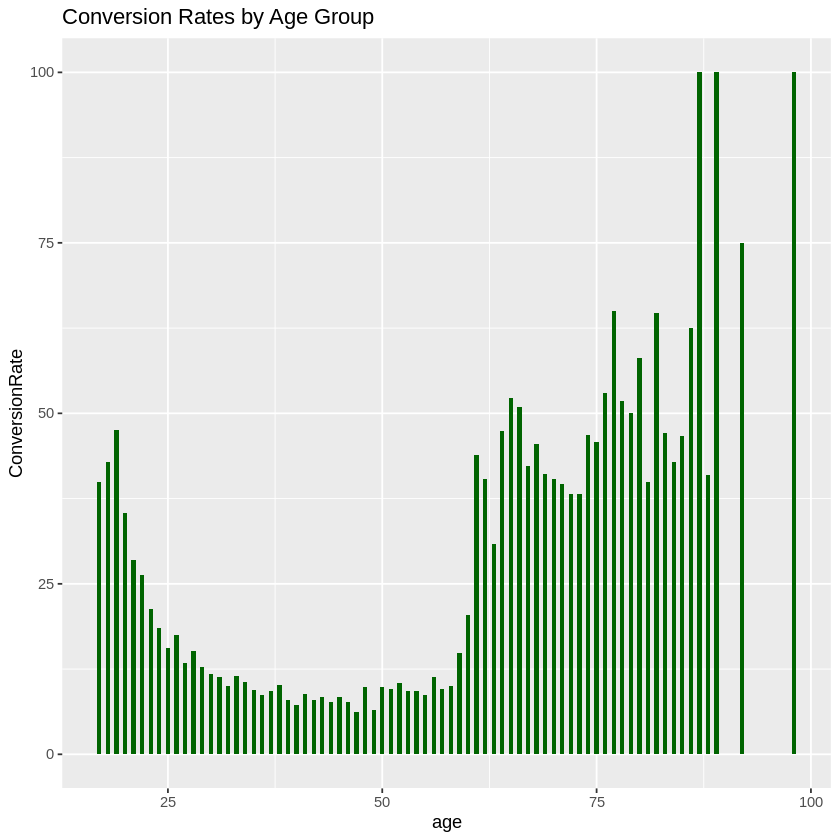

In [12]:
conversionsAgeGroup <- data %>%
  group_by(age) %>%
  summarize(TotalCount=n(), NumberConversions=sum(y)) %>%
  mutate(ConversionRate=NumberConversions/TotalCount*100)

#visualizing conversions by age group
ggplot(data=conversionsAgeGroup, aes(x=age, y=ConversionRate)) +
  geom_bar(width=0.5, stat="identity", fill="darkgreen") +
  labs(title="Conversion Rates by Age Group")

As we can see on the plot, 60+ age people responded better to the bank marketing campaign compared to the other age groups.


## Conversion analysis by job

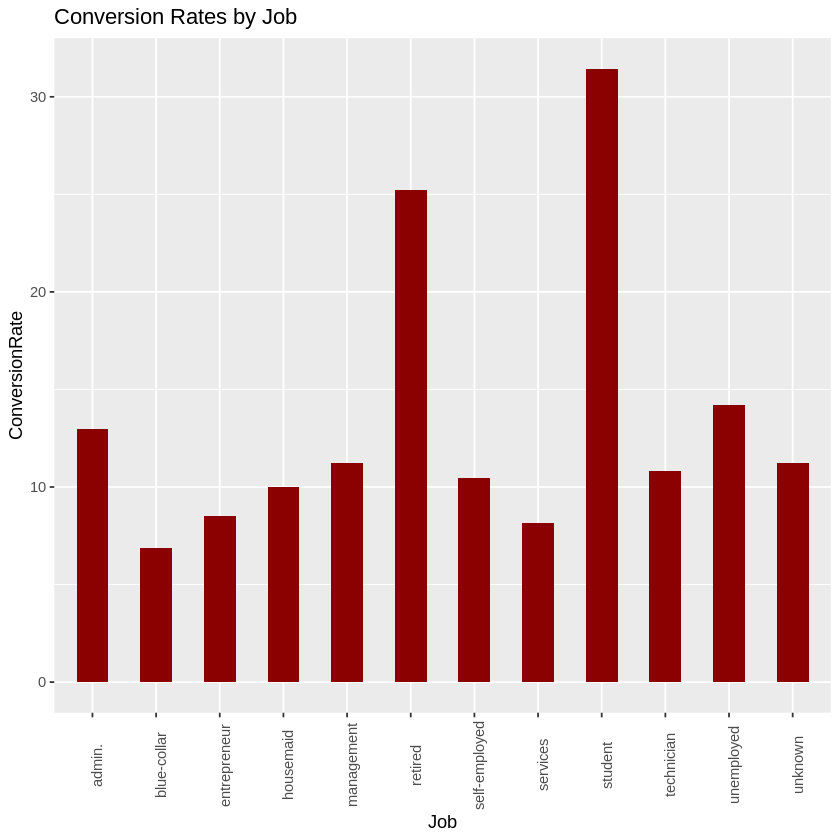

In [20]:
#group the data
conversionsJob <- data %>%
  group_by(Job=job) %>%
  summarize(TotalCount=n(), NumberConversions=sum(y)) %>%
  mutate(ConversionRate=NumberConversions/TotalCount*100) %>%
  arrange(desc(ConversionRate))

# visualizing conversions by job
ggplot(conversionsJob, aes(x=Job, y=ConversionRate)) +
  geom_bar(width=0.5, stat = "identity", fill="darkred") +
  labs(title="Conversion Rates by Job") +
  theme(axis.text.x = element_text(angle = 90))

Students and retired people have a higher conversion rate than other "job" groups. The blue-collar group has the lowest conversion rate.


## Conversions by age group and marital status

`summarise()` has grouped output by 'AgeGroup'. You can override using the
`.groups` argument.


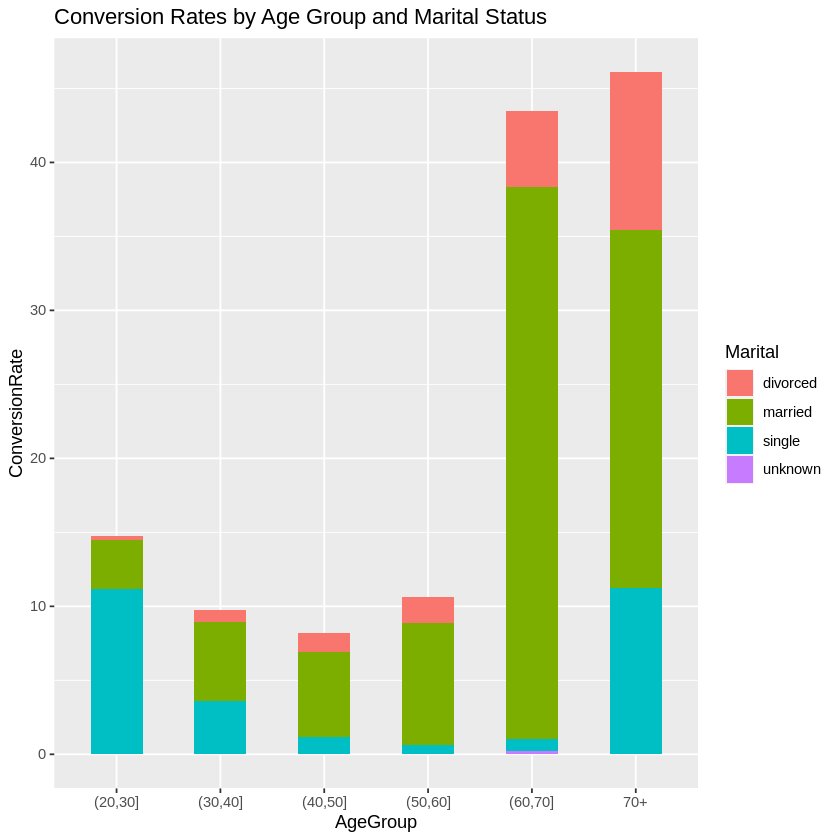

In [59]:
# group the data
conversionsAgeMarital <- data %>%
  group_by(AgeGroup=cut(age, breaks=seq(20,70, by=10)),
           Marital=marital) %>%
  summarize(Count=n(), NumConversions=sum(y)) %>%
  mutate(TotalCount=sum(Count)) %>%
  mutate(ConversionRate=NumConversions/TotalCount*100)

#rename the last group
conversionsAgeMarital$AgeGroup <- as.character(conversionsAgeMarital$AgeGroup)
conversionsAgeMarital$AgeGroup[is.na(conversionsAgeMarital$AgeGroup)] <- "70+"

#visualizing conversions by age group and marrital status
ggplot(conversionsAgeMarital, aes(x=AgeGroup, y=ConversionRate, fill=Marital)) +
  geom_bar(width=0.5, stat = "identity") +
  labs(title="Conversion Rates by Age Group and Marital Status")

In the groups from 30 to 70+ age, married people are more likely to convert (could be because they are the majority in these age groups). People with the "single" marital status convert better in the age group {20, 30].


##Central Limit Theorem

Sample Size = 5  Mean = 257.6764  SD = 119.115 
Sample Size = 10  Mean = 255.8212  SD = 78.46604 
Sample Size = 20  Mean = 261.7393  SD = 59.16797 
Sample Size = 30  Mean = 260.193  SD = 48.49895 
Sample Size = 4000  Mean = 258.5156  SD = 3.84039 


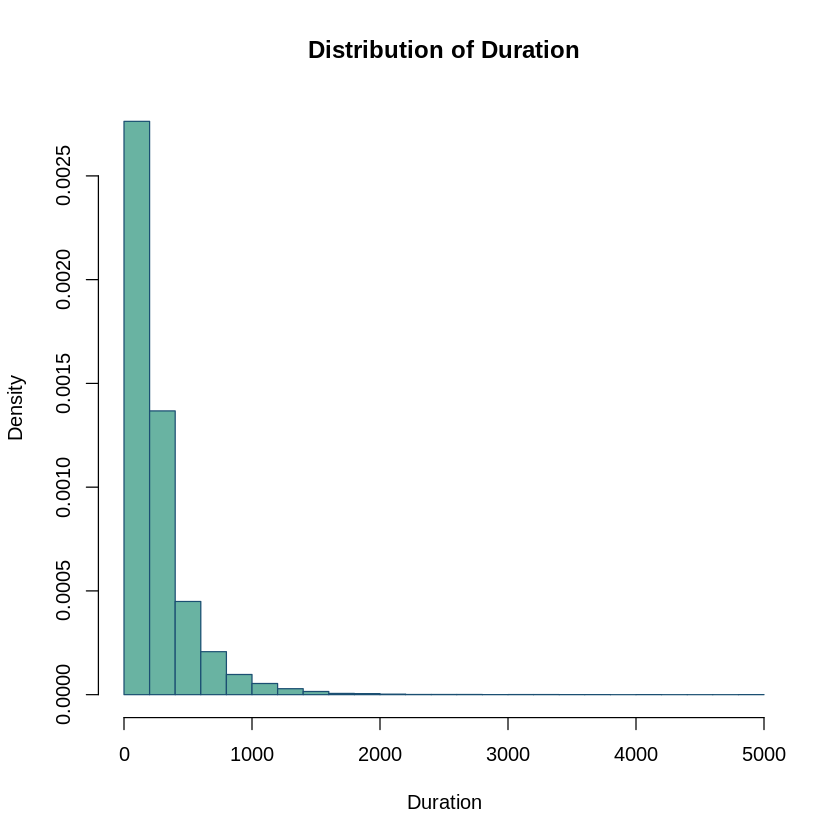

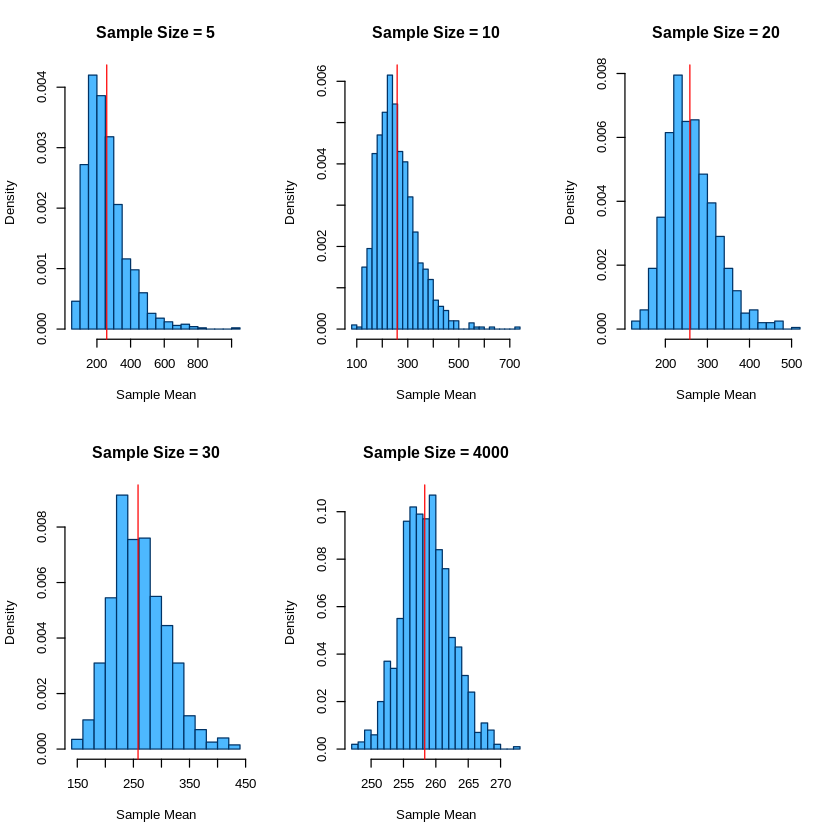

In [60]:
# 1. Plotting the distribution of data$duration
hist(data$duration, prob = TRUE, main = "Distribution of Duration", xlab = "Duration", breaks = 20,
col = "#69b3a2", border = "#1b4f72")

samples <- 1000
sample_sizes <- c(5, 10, 20, 30, 4000)

# 2. Plotting layout for multiple histograms
par(mfrow = c(2,3))
for (size in sample_sizes) {
    xbar <- numeric(samples)
    for (i in 1:samples) {
        sample_indices <- sample(seq_along(data$duration), size, replace = TRUE)
        xbar[i] <- mean(data$duration[sample_indices])
    }

    # Plotting the histogram of sample means
    hist(xbar, prob = TRUE, breaks = "Scott", main = paste("Sample Size =", size), xlab = "Sample Mean",col = "#4db8ff", border = "#003366")
    abline(v = mean(data$duration), col = "red")  # Mean of the original data for reference

    # Output the mean and SD of the sample means
    cat("Sample Size =", size, " Mean =", mean(xbar), " SD =", sd(xbar), "\n")
}


# Sampling methods

In [46]:
srs_with_replacement <- data[sample(1:nrow(data), size = 100, replace = TRUE), ]
srs_without_replacement <- data[sample(1:nrow(data), size = 100, replace = FALSE), ]


In [ ]:
stratified_with_replacement <- data %>%
  group_by(marital) %>%
  sample_n(size = 2, replace = TRUE) %>%
  ungroup()
stratified_with_replacement <- data %>%
  group_by(marital) %>%
  sample_n(size = 2, replace = FALSE) %>%
  ungroup()

In [56]:
age <- unique(data$age)
selected_age_with_replacement <- sample(age, size = 10, replace = TRUE)
cluster_sample_with_replacement <- data %>%
  filter(age %in% selected_age_with_replacement)
cluster_sample_with_replacement <- cluster_sample_with_replacement[sample(1:nrow(cluster_sample_with_replacement), size = 10, replace = TRUE), ]

age <- unique(data$age)
selected_age_with_replacement <- sample(age, size = 10, replace = FALSE)
cluster_sample_with_replacement <- data %>%
  filter(age %in% selected_age_with_replacement)
cluster_sample_with_replacement <- cluster_sample_with_replacement[sample(1:nrow(cluster_sample_with_replacement), size = 10, replace = FALSE), ]



## Summarized Recommendations for the Bank’s Marketing Strategy

### Target Audience Insights

#### Age and Conversion Trends
Our analysis highlights that individuals over 60 years and students show a notably higher conversion rate compared to other demographic groups. This suggests a targeted approach in marketing campaigns, emphasizing products tailored to their specific financial needs.

#### Job Categories and Response Rates
Different job categories exhibit distinct conversion behaviors. Notably, the blue-collar group demonstrates the lowest conversion rates. In contrast, retired individuals and students are more receptive to the offers, likely due to their distinct financial stages and needs.

#### Marital Status and Age Group Dynamics
There's a trend where married individuals within the 30 to 70+ age range show higher conversion rates, potentially reflecting financial stability or goals related to family planning. Interestingly, singles in the 20-30 age bracket are more responsive, possibly due to their early career financial needs and aspirations.

## Conclusions on Using Sampled Data for Strategy

### Bias and Representativeness
Using samples, particularly through stratified or cluster sampling, helps to highlight distinct behaviors in specific groups more clearly than the full dataset might show. This approach enhances targeted campaign strategies but needs cautious handling to prevent overgeneralizing results.

### Impact on Decision Making
Relying on sampled data instead of the entire dataset can shift focus to visible trends and patterns, potentially overshadowing broader trends or significant outliers. This could affect the comprehensiveness and efficacy of strategic decisions.

### Sampling Method Considerations
- **Simple Random Sampling**: Provides a general overview, but may overlook detailed behaviors in specific subgroups.
- **Stratified Sampling**: Emphasizes differences and commonalities within groups, aiding in more focused marketing strategies. However, it might miss interactions between groups.
- **Cluster Sampling**: Targets specific segments such as geographical or organizational clusters, useful for local strategies but might not capture global market trends.
